In [4]:
# -*- coding:utf-8 -*-
# !/usr/bin/python
# Author: Selvaria
# 尝试使用jieba库对中文解码，从而可以实现文字向量化

'''编号要注意下：
所有编号都减1，因为没有0标签。
编号为7的为台湾，29的为西藏，因为企业太少删掉了。
注意回查的时候加减序号'''

import jieba

test_name = '中化石油辽宁（朝阳）有限公司'

s_list = jieba.cut(test_name)
s_list_all = jieba.cut(test_name, cut_all=True) #cut和cut_for_search返回的都是generator，如果想直接返回列表，需要使用lcut和lcut_for_search
print(type(s_list))
print(s_list_all)

s_list = jieba.lcut(test_name)
s_list_all = jieba.lcut(test_name, cut_all=True)
s_list_search = jieba.lcut_for_search(test_name)
print(s_list)
print(s_list_all)
print(s_list_search)

Building prefix dict from the default dictionary ...


<class 'generator'>
<generator object Tokenizer.cut at 0x00000230263E9620>


Dumping model to file cache C:\Users\PC\AppData\Local\Temp\jieba.cache
Loading model cost 0.747 seconds.
Prefix dict has been built succesfully.


['中化', '石油', '辽宁', '（', '朝阳', '）', '有限公司']
['中化', '化石', '石油', '辽宁', '', '', '朝阳', '', '', '有限', '有限公司', '公司']
['中化', '石油', '辽宁', '（', '朝阳', '）', '有限', '公司', '有限公司']


In [5]:
#为分离好的汉字设置索引

token_index ={}

for word in s_list:
    if word not in token_index:
        token_index[word] = len(token_index) + 1 #注意去掉0索引
        
token_index

{'中化': 1, '有限公司': 7, '朝阳': 5, '石油': 2, '辽宁': 3, '（': 4, '）': 6}

In [7]:
def cut_name(name): #jieba分解公司名字
    s_list = jieba.lcut(name)
    return s_list

In [6]:
import pymysql
import pandas

connection = pymysql.connect(host = '47.92.25.70',user = 'root',password = 'Wfn031641',db = 'zhaoshang',charset = 'utf8')

sql = "select com, province, city from dic_company"
    
df_sql = pandas.read_sql(sql, connection)
df_sql.head()

,com,province,city
0,山东墨龙石油机械股份有限公司,山东,济南市
1,山东省石油化工有限公司,山东,济南市
2,山东中熬石油燃气有限公司,山东,济南市
3,山东石油天然气股份有限公司,山东,济南市
4,中海日升石油有限公司,山东,济南市


In [20]:
connection = pymysql.connect(host = '47.92.25.70',user = 'root',password = 'Wfn031641',db = 'zhaoshang',charset = 'utf8')

sql_j = "SELECT `com`, `province`, `city`, n.`province_id` FROM `dic_company` m JOIN `dic_city` n ON m.`city` = n.`name`"
    
df_label = pandas.read_sql(sql_j, connection)
df_label.head()

,com,province,city,province_id
0,山东墨龙石油机械股份有限公司,山东,济南市,16
1,山东省石油化工有限公司,山东,济南市,16
2,山东中熬石油燃气有限公司,山东,济南市,16
3,山东石油天然气股份有限公司,山东,济南市,16
4,中海日升石油有限公司,山东,济南市,16


In [14]:
from sklearn.preprocessing import LabelEncoder

df_label = df_sql[['com']]

le = LabelEncoder()
le.fit(df_sql['province'])
df_col = le.transform(df_sql['province'])
df_label['province'] = df_col
df_label.head()

D:\Selvaria\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,com,province
0,山东墨龙石油机械股份有限公司,10
1,山东省石油化工有限公司,10
2,山东中熬石油燃气有限公司,10
3,山东石油天然气股份有限公司,10
4,中海日升石油有限公司,10


In [21]:
df_need = df_label[['com', 'province_id']]

In [81]:
df_shuffle = df_need.sample(frac=1).reset_index(drop=True)
print(len(df_shuffle))
df_shuffle.head()

89229


,com,province_id
0,寻甸杰薪生物能源有限公司,25
1,瓦房店市通源养殖场,8
2,漳州市盛鑫石化有限公司,14
3,五河县中同石化销售有限公司,13
4,中商墨菲能源（大连）有限公司,8


In [83]:
df_shuffle.to_csv('D:/data/com_name.csv', encoding='gb18030', index=False)

In [121]:
df_shuffle = pandas.read_csv('D:/data/com_name.csv', encoding='gb18030')
for index in df_shuffle.index:
    p_id = df_shuffle.loc[index, 'province_id']
    p_id_new = p_id -1
    if p_id > 7 and p_id < 29:
        df_shuffle.loc[index, 'province_id'] = p_id_new - 1
    elif p_id > 29:
        df_shuffle.loc[index, 'province_id'] = p_id_new - 2
    else:
        df_shuffle.loc[index, 'province_id'] = p_id_new
#df_temp = df_shuffle.tail(9000)
df_temp = df_shuffle[80000:]

#df_t = df_temp.groupby("province_id")
df_t = df_temp.drop_duplicates(subset=['province_id'],keep='last') 
print(len(df_t))
df_t #27,3,19

30


,com,province_id
87186,宁夏宝丰能源集团股份有限公司,27
87220,重庆渝久化工原料有限公司,3
87457,庆阳励德能源开发有限公司,19
87623,海南富山油气化工有限公司,24
87966,六枝黔鑫能源开发有限公司,21
88289,中化国际石油（天津）有限公司,1
88370,成都天煜化工有限公司,20
88912,中石油天然气陕西渭南销售分公司,25
88940,乌鲁木齐中凯达利石油化工有限公司,28
88954,上海科运石油化工有限公司,2


In [116]:
df_shuffle.to_csv('D:/data/com_name_index_change.csv', encoding='gb18030', index=False)

In [104]:
train_data_str = df_shuffle['com'].values
train_data_str

array(['寻甸杰薪生物能源有限公司', '瓦房店市通源养殖场', '漳州市盛鑫石化有限公司', ...,
       '中国石化销售有限公司河北沧州盐山第五加油站', '江苏泰山石油化工有限公司', '东营市天星新能源科技有限公司'],
      dtype=object)

In [105]:
name_split_list = []
for name in train_data_str:
    name_split = cut_name(name[:-4])
    name_split_list.append(name_split)
name_split_list

[['寻甸', '杰薪', '生物', '能源'],
 ['瓦房店市', '通'],
 ['漳州市', '盛鑫', '石化'],
 ['五河县', '中同', '石化', '销售'],
 ['中商', '墨菲', '能源', '（', '大连', '）'],
 ['大连', '长兴岛', '经济区', '交流', '岛', '办事处', '孙'],
 ['山东', '立', '为', '能源'],
 ['新民市', '小太'],
 ['中国', '石化', '销售', '有限公司', '河北', '秦皇岛', '卢龙', '长'],
 ['海林市', '振兴', '能源'],
 ['中石化', '碧辟', '(', '浙江', ')', '石油', '有限公司', '余姚', '沥'],
 ['中化', '石油', '山东', '有限公司', '聊城市', '西环'],
 ['山东', '壳牌', '石油', '有限公司', '潍坊', '清池', '街'],
 ['庄河市', '隆'],
 ['营口', '鸿', '大', '石化'],
 ['翼城县', '金鑫', '石化'],
 ['张家港', '保税区', '泰顺', '福', '国际贸易'],
 ['辉县市', '安邦', '石化'],
 ['苏州', '贝林达', '石油化工', '有限公司', '杨'],
 ['中化', '石油', '江苏', '无锡'],
 ['南通市', '林燕', '高压', '石化', '管件'],
 ['东营', '胜凯', '达', '石油', '机械设备'],
 ['山东', '弘鼎', '石化', '工程建设', '有限公司', '盘'],
 ['大', '连同', '鑫', '石化'],
 ['锦州', '中联重科', '化工'],
 ['中国', '石化', '销售', '有限公司', '广西', '百色', '田阳', '石'],
 ['中国', '石油', '天然气', '股份', '有限公司', '大港', '石'],
 ['中国', '石化', '销售', '有限公司', '湖', '南岳', '阳', '华容', '万'],
 ['大连', '长兴岛', '经济区', '长兴岛', '办事处', '英楠汽'],
 ['廊坊', '多科', '精细化工'],

In [106]:
#one-hot编码数据

import numpy as np

token_index ={}

for name_list in name_split_list:
    for word in name_list:
        if word not in token_index:
            token_index[word] = len(token_index) + 1 #注意去掉0索引
        
print(token_index)

{'寻甸': 1, '杰薪': 2, '生物': 3, '能源': 4, '瓦房店市': 5, '通': 6, '漳州市': 7, '盛鑫': 8, '石化': 9, '五河县': 10, '中同': 11, '销售': 12, '中商': 13, '墨菲': 14, '（': 15, '大连': 16, '）': 17, '长兴岛': 18, '经济区': 19, '交流': 20, '岛': 21, '办事处': 22, '孙': 23, '山东': 24, '立': 25, '为': 26, '新民市': 27, '小太': 28, '中国': 29, '有限公司': 30, '河北': 31, '秦皇岛': 32, '卢龙': 33, '长': 34, '海林市': 35, '振兴': 36, '中石化': 37, '碧辟': 38, '(': 39, '浙江': 40, ')': 41, '石油': 42, '余姚': 43, '沥': 44, '中化': 45, '聊城市': 46, '西环': 47, '壳牌': 48, '潍坊': 49, '清池': 50, '街': 51, '庄河市': 52, '隆': 53, '营口': 54, '鸿': 55, '大': 56, '翼城县': 57, '金鑫': 58, '张家港': 59, '保税区': 60, '泰顺': 61, '福': 62, '国际贸易': 63, '辉县市': 64, '安邦': 65, '苏州': 66, '贝林达': 67, '石油化工': 68, '杨': 69, '江苏': 70, '无锡': 71, '南通市': 72, '林燕': 73, '高压': 74, '管件': 75, '东营': 76, '胜凯': 77, '达': 78, '机械设备': 79, '弘鼎': 80, '工程建设': 81, '盘': 82, '连同': 83, '鑫': 84, '锦州': 85, '中联重科': 86, '化工': 87, '广西': 88, '百色': 89, '田阳': 90, '石': 91, '天然气': 92, '股份': 93, '大港': 94, '湖': 95, '南岳': 96, '阳': 97, '华容': 98, '万': 99, '英楠汽': 100

In [107]:
max_value = max(token_index.values())
print(max_value)

42567


In [48]:
max_length = 15 #只考虑每个样本前15个词组

results = np.zeros(shape=(len(name_split_list),
                         max_length,
                         max_value + 1),dtype='float16')
for i, name_list, in enumerate(name_spilt_list):
    for j, word in list(enumerate(name_list))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.
        
results[0]

MemoryError: 

In [108]:
name_index_all = []
for name_list in name_split_list:
    name_index_list=[]
    for word in name_list:
        name_index = token_index.get(word)
        name_index_list.append(name_index)
    name_index_all.append(name_index_list)
    
name_index_all

[[1, 2, 3, 4],
 [5, 6],
 [7, 8, 9],
 [10, 11, 9, 12],
 [13, 14, 4, 15, 16, 17],
 [16, 18, 19, 20, 21, 22, 23],
 [24, 25, 26, 4],
 [27, 28],
 [29, 9, 12, 30, 31, 32, 33, 34],
 [35, 36, 4],
 [37, 38, 39, 40, 41, 42, 30, 43, 44],
 [45, 42, 24, 30, 46, 47],
 [24, 48, 42, 30, 49, 50, 51],
 [52, 53],
 [54, 55, 56, 9],
 [57, 58, 9],
 [59, 60, 61, 62, 63],
 [64, 65, 9],
 [66, 67, 68, 30, 69],
 [45, 42, 70, 71],
 [72, 73, 74, 9, 75],
 [76, 77, 78, 42, 79],
 [24, 80, 9, 81, 30, 82],
 [56, 83, 84, 9],
 [85, 86, 87],
 [29, 9, 12, 30, 88, 89, 90, 91],
 [29, 42, 92, 93, 30, 94, 91],
 [29, 9, 12, 30, 95, 96, 97, 98, 99],
 [16, 18, 19, 18, 22, 100],
 [101, 102, 103],
 [104, 105, 106],
 [29, 9, 12, 30, 107, 108, 42, 109, 110, 111],
 [29, 9, 12, 30, 112, 113, 114, 115],
 [29, 9, 12, 30, 107, 116, 42, 109, 117],
 [118, 42],
 [16, 119, 120, 121],
 [37, 122, 123, 30, 124, 125],
 [24, 126, 68, 30, 127],
 [128, 129, 130, 87, 131],
 [132, 133, 9],
 [134, 135, 136, 30, 137],
 [16, 138, 139, 30, 119],
 [24, 140

In [109]:
from scipy.sparse import coo_matrix

def vectorize_name_list(name_list, dimension):
    results = coo_matrix((len(name_list), dimension), dtype=np.int8).toarray()
    for i, name_index in enumerate(name_list):
        results[i, name_index] = 1
    return results

train_data = vectorize_name_list(name_index_all, max_value+1)
train_data[0]

array([0, 1, 1, ..., 0, 0, 0], dtype=int8)

In [122]:
from keras.utils.np_utils import to_categorical  #这个方法有个大问题，就是必须是严格按照数字顺序，不能有跳过

x_train = train_data[:70000] #训练
x_train_part = train_data[70000:80000] #测试
x_test = train_data[80000:] #验证

train_labels = df_shuffle['province_id'].values

#y_train = to_categorical(train_labels[:70000]) 
#y_train_part = to_categorical(train_labels[70000:80000])
#y_test = to_categorical(train_labels[80000:])

def one_hot_labels(label_list, dimension):
    results = np.zeros((len(label_list), dimension))
    for i, label in enumerate(label_list):
        results[i, label] = 1
    return results

y_train = one_hot_labels(train_labels[:70000], 30)
y_train_part = one_hot_labels(train_labels[70000:80000], 30)
y_test = one_hot_labels(train_labels[80000:], 30)

print(y_test[0])
print(len(y_test[0]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
30


In [113]:
list_labels = list(train_labels)
print(set(list_labels))
print(len(set(list_labels)))

{1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32}
30


In [98]:
from keras import models
from keras.layers import Dense, Activation

model = models.Sequential()
model.add(Dense(128, activation='relu', input_shape=(max_value+1,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(30, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               5448832   
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                1950      
Total params: 5,475,550
Trainable params: 5,475,550
Non-trainable params: 0
_________________________________________________________________


In [123]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    x_train,
    y_train,
    epochs=20, #样本训练20次
    batch_size=512, #每批次样本数量
    validation_data=(x_train_part,y_train_part)
)

Train on 70000 samples, validate on 10000 samples
Epoch 1/20
70000/70000 [==============================] - 28s 406us/step - loss: 0.8804 - acc: 0.8101 - val_loss: 0.2278 - val_acc: 0.9552
Epoch 2/20
70000/70000 [==============================] - 26s 377us/step - loss: 0.1351 - acc: 0.9742 - val_loss: 0.1334 - val_acc: 0.9733
Epoch 3/20
70000/70000 [==============================] - 26s 377us/step - loss: 0.0701 - acc: 0.9868 - val_loss: 0.1105 - val_acc: 0.9779
Epoch 4/20
70000/70000 [==============================] - 26s 375us/step - loss: 0.0437 - acc: 0.9920 - val_loss: 0.1033 - val_acc: 0.9796
Epoch 5/20
70000/70000 [==============================] - 26s 375us/step - loss: 0.0303 - acc: 0.9944 - val_loss: 0.0990 - val_acc: 0.9816
Epoch 6/20
70000/70000 [==============================] - 26s 374us/step - loss: 0.0224 - acc: 0.9962 - val_loss: 0.1013 - val_acc: 0.9817
Epoch 7/20
70000/70000 [==============================] - 26s 373us/step - loss: 0.0168 - acc: 0.9969 - val_loss: 0.

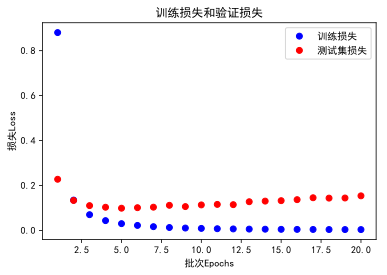

In [124]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg' #画的图更清晰

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs, loss_values,'bo',label='训练损失') #bo是蓝色圆点
plt.plot(epochs, val_loss_values,'ro',label='测试集损失') 
plt.title('训练损失和验证损失')
plt.xlabel('批次Epochs')
plt.ylabel('损失Loss')
plt.legend()
plt.show()

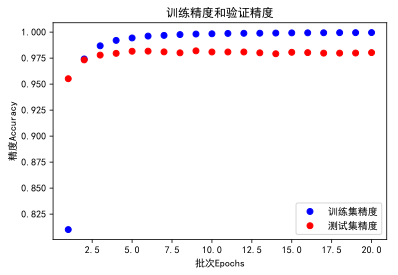

In [125]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs, acc,'bo',label='训练集精度') #bo是蓝色圆点
plt.plot(epochs, val_acc,'ro',label='测试集精度') #ro是红色点
plt.title('训练精度和验证精度')
plt.xlabel('批次Epochs')
plt.ylabel('精度Accuracy')
plt.legend()
plt.show()

In [126]:
model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=512,
    validation_data=(x_train_part,y_train_part)
)

result = model.evaluate(x_test, y_test)
result

Train on 70000 samples, validate on 10000 samples
Epoch 1/5
70000/70000 [==============================] - 27s 386us/step - loss: 0.0039 - acc: 0.9995 - val_loss: 0.1579 - val_acc: 0.9777
Epoch 2/5
70000/70000 [==============================] - 25s 355us/step - loss: 0.0038 - acc: 0.9995 - val_loss: 0.1611 - val_acc: 0.9797
Epoch 3/5
70000/70000 [==============================] - 24s 350us/step - loss: 0.0038 - acc: 0.9996 - val_loss: 0.1589 - val_acc: 0.9797
Epoch 4/5
70000/70000 [==============================] - 25s 356us/step - loss: 0.0036 - acc: 0.9996 - val_loss: 0.1632 - val_acc: 0.9801
Epoch 5/5
9224/9224 [==============================] - 5s 501us/step


[0.16498392197365877, 0.9791847354726799]

In [162]:
#test_com = '六枝黔鑫能源开发有限公司'
#test_com = '大连万达股份有限公司'
#test_com = '北京思创银联科技股份有限公司'
#test_com = '中国石油天然气股份有限公司吉林延边销售分公司'
#test_com = '河池嘉茂贸易有限公司'
test_com = '深圳市音煌电子科技有限公司'


def handle_name(name):
    name_split = cut_name(name[:-4])
    name_index_list=[]
    for word in name_split:
        name_index = token_index.get(word)
        if name_index == None:
            continue
        name_index_list.append(name_index)
    print(name_index_list)
    input_data = vectorize_name_list([name_index_list,], max_value+1)
    return input_data

name_vector = handle_name(test_com)
name_vector

[363, 31313]


array([[0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [163]:
def get_real_location(raw_output):
    output = raw_output + 1
    if output > 6 and output < 27:
        result = output + 1
    elif output >= 27:
        result = output + 2
    else:
        result = output
    return result

prediction = model.predict(name_vector)
#print(prediction[0].shape)
raw_result = np.argmax(prediction[0])
print('最大可能分类的索引：',raw_result)
print('accuracy:',prediction[0][raw_result])
prov_index = get_real_location(raw_result)
print('province index:', prov_index)

connection = pymysql.connect(host = '47.92.25.70',user = 'root',password = 'Wfn031641',db = 'zhaoshang',charset = 'utf8')

with connection.cursor() as cursor: 
    sql = "SELECT `province`, n.`province_id` FROM `dic_company` m JOIN `dic_city` n ON m.`city` = n.`name` \
    where n.`province_id` = '%s'" %str(prov_index)
    cursor.execute(sql)
    prov_result = cursor.fetchone()
print(prov_result)

最大可能分类的索引： 18
accuracy: 0.9995302
province index: 20
('广东', 20)


In [154]:
list_test = [[7,14,19,17], [4,12,14,17]]
vector_test = vectorize_name_list(list_test, 20)
vector_test

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0]],
      dtype=int8)

In [155]:
for i, name_list, in enumerate(list_test):
    print(i, name_list)

0 [7, 14, 19, 17]
1 [4, 12, 14, 17]
